In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('exchange-rate-twi.csv')
data.columns=['Month', 'ExchangeRate']
data = data.set_index('Month')
data.head(12)

,ExchangeRate
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
6,99.2
7,99.2
8,99.3
9,100.0


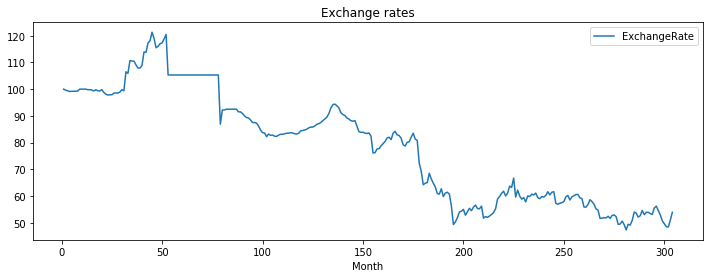

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Exchange rates")
plt.show(block=False)

In [4]:
train_len = 212 #give

train = data[:train_len]
test = data[train_len:] 

In [5]:
train.tail(2)

,ExchangeRate
Month,
211,52.3
212,52.0


In [6]:
len(train.index)

212

In [7]:
train['ExchangeRate'].mean()

88.32547169811328

In [8]:
# using simple average method
y_hat_average = test.copy()
y_hat_average['avg_forecast'] = train['ExchangeRate'].mean()

In [9]:
train_len

212

In [10]:
train['ExchangeRate'][train_len]

52.0

In [11]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['ExchangeRate'][train_len] # last observation in train data is our prediction

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['ExchangeRate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['ExchangeRate'] - y_hat_naive['naive_forecast'])/test['ExchangeRate'])*100, 2)
rmse, mape

(5.98, 8.41)

In [13]:
100-mape, 1-mape

(91.59, -7.41)

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['ExchangeRate'], y_hat_average['avg_forecast'])).round(2)
mape = np.round(np.mean((100*np.abs(test['ExchangeRate'] - y_hat_average['avg_forecast'])/test['ExchangeRate'])), 2)
rmse, mape

(32.42, 58.12)

## Simple moving average

In [15]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['ExchangeRate'].rolling(ma_window).mean()
# adjustment for test period
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len]

In [16]:
rmse = np.sqrt(mean_squared_error(test['ExchangeRate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['ExchangeRate'] - y_hat_sma['sma_forecast'][train_len:])/test['ExchangeRate'])*100, 2)

In [17]:
rmse, mape

(4.66, 6.96)

In [18]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['ExchangeRate'].rolling(ma_window).mean()
# adjustment for test period
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len]

In [19]:
rmse = np.sqrt(mean_squared_error(test['ExchangeRate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['ExchangeRate'] - y_hat_sma['sma_forecast'][train_len:])/test['ExchangeRate'])*100, 2)

In [20]:
rmse, mape

(4.9, 7.13)

In [21]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['ExchangeRate'].rolling(ma_window).mean()
# adjustment for test period
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len]

In [22]:
rmse = np.sqrt(mean_squared_error(test['ExchangeRate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['ExchangeRate'] - y_hat_sma['sma_forecast'][train_len:])/test['ExchangeRate'])*100, 2)

In [23]:
rmse, mape

(5.98, 8.41)

### ADF and KPSS Test

In [24]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['ExchangeRate'].dropna())
adf_test

print('ADF statistic: %f' % adf_test[0])
print('Critical value @0.05: %.2f' %adf_test[4]['5%'] )
print('p-value: %f' %adf_test[1])

ADF statistic: -0.805468
Critical value @0.05: -2.87
p-value: 0.817511


In [25]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data['ExchangeRate'].dropna())

print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value %f' % kpss_test[1])

KPSS statistic 1.725897
Critical value @ 0.05: 0.46
p-value 0.010000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
